# M-dist vs. Euclidean - 2d

In [336]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from htmresearch.support.gridcells.mdist.utils import *
%load_ext autoreload
%autoreload 2



m = 5
# S = np.ones(m)
S = np.random.normal(1.,0.05,m)
# S = np.sqrt(2)**np.arange(m)
k = 2
B, V, S, Theta = create_hyper_module(m, S)

V = np.zeros((m,2))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


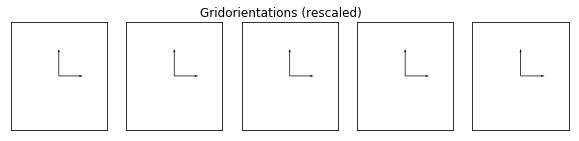

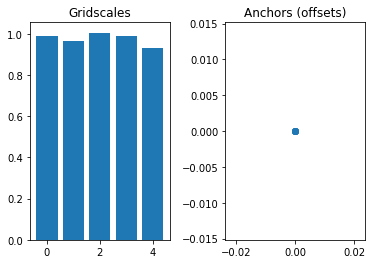

In [337]:
fig, ax = plt.subplots(1, m, figsize=(2*m, 2));
plt.suptitle("Gridorientations (rescaled)")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

for i in range(m):
    ax[i].set_xlim(-2,2)
    ax[i].set_ylim(-2,2)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

    r1 = B[i,0,:] / S[i]
    r2 = B[i,1,:] / S[i]

    ax[i].quiver(0.0,0.0,r1[:2],r2[:2], angles='xy', scale_units='xy', scale=1)


plt.savefig("media/summary/{}d_orientations_m{}.pdf".format(k,m), dpi=150)
plt.show()



fig, ax = plt.subplots(1, 2);
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.4, hspace=None)

ax[0].set_title("Gridscales")
ax[0].bar(range(m), S)

ax[1].set_title("Anchors (offsets)")
ax[1].scatter(V[:,0], V[:,1])

plt.savefig("media/summary/{}d_scales_m{}.pdf".format(k,m), dpi=150)
plt.show()


(100000, 2)
(100000, 5, 2)
(2, 10) (100000, 10) (100000, 10)


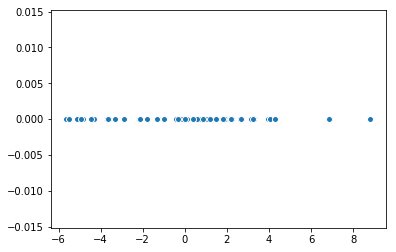

In [338]:


T = 100000

X  = np.random.multivariate_normal(mean=np.zeros(k), cov=10.01*np.eye(k), size=T)
X_ = np.random.multivariate_normal(mean=np.zeros(k), cov=10.01*np.eye(k), size=T)

X[:,1] = 0.
X_[:,1] = 0.



print X.shape
P  = map_to_hypertorus(B, V, X )
Q  = map_to_hypertorus(B, V, X_)    

print Q.shape
G = geod_on_hypertorus(P,Q) 
Geod = G.reshape((T,2*m)) 


DP  = map_to_hypertorus(B, V, np.array([ [0.0, 0.0], [0.0, 0.0] ]) )
DQ  = map_to_hypertorus(B, V, np.array([ [0.2, 0.0], [0.0, 0.2] ]))

Leaf = geod_on_hypertorus(DP,DQ)
Leaf = Leaf.reshape((2,2*m)) 
Leaf = Leaf / np.linalg.norm(Leaf, axis=1, keepdims=True)


Rec  =  sum([
            np.sum(Geod*Leaf[[i]], axis=1, keepdims=True)*Leaf[[i]] 
        for i in [0,1]])



print Leaf.shape, Rec.shape, Geod.shape

num_samples = 50
plt.scatter(X[:num_samples, 0], X[:num_samples, 1], edgecolor='white')


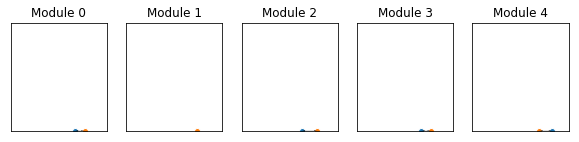

In [339]:



fig, ax = plt.subplots(1, m, figsize=(2*m, 2));
for i in range(m):
    ax[i].set_title("Module {}".format(i))
    ax[i].set_xlim(0.,1)
    ax[i].set_ylim(0.,1)

    ax[i].set_xticks([])
    ax[i].set_yticks([])

    num_samples = 1
    ax[i].scatter(P[:num_samples,i,0],P[:num_samples,i,1], edgecolor='white')
    ax[i].scatter(Q[:num_samples,i,0],Q[:num_samples,i,1], edgecolor='white')
    
    ax[i].quiver(P[:num_samples,i,0],P[:num_samples,i,1], G[:num_samples,i,0],G[:num_samples,i,1], angles='xy', scale_units='xy', scale=1) 
    ax[i].quiver(Q[:num_samples,i,0],Q[:num_samples,i,1], -G[:num_samples,i,0], - G[:num_samples,i,1], angles='xy', scale_units='xy', scale=1) 
    
    
#     DX = Leaf[0].reshape((m,2))
#     ax[i].scatter(DP[0,i,0],DP[0,i,1], edgecolor='white')
#     ax[i].scatter(DQ[0,i,0],DQ[0,i,1], edgecolor='white')
    
#     ax[i].quiver(DP[0,i,0], DP[0,i,1],  DX[i,0],  DX[i,1], angles='xy', scale_units='xy', scale=1) 
#     ax[i].quiver(DQ[0,i,0], DQ[0,i,1], -DX[i,0], -DX[i,1], angles='xy', scale_units='xy', scale=1) 
    
    

plt.show()


(100000, 10) (100000, 10)


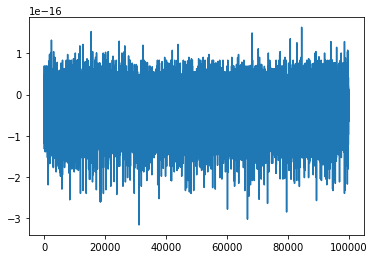

0.932421810396
(100000,) (100000,)


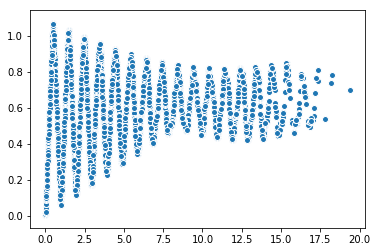

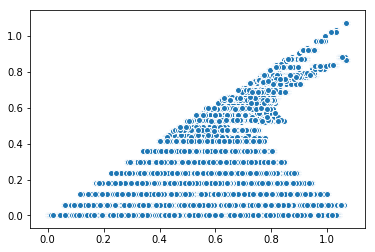

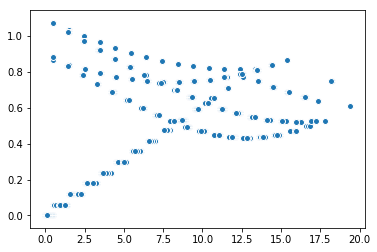

In [344]:
md = M_dist(P, Q, S=S)
ed = np.linalg.norm(X - X_,  axis=1)

print Rec.shape, Geod.shape

Cat = Geod - Rec
C = np.linalg.norm(Cat, axis=1)
# C = np.minimum(C, 2.-C)
# C = np.max(Cat, axis=1)
# C = np.sum(Rec*Geod, axis=1)


plt.plot(np.sum(Cat*Rec, axis=1))
plt.show()
print S[-1]

print ed.shape, C.shape
plt.scatter(ed, md, edgecolor="white")
plt.show()
plt.scatter(md, C, edgecolor="white")
plt.show()
plt.scatter(ed,C  , edgecolor="white")
plt.show()

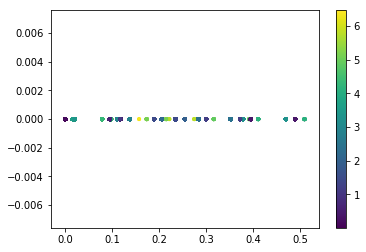

In [259]:
D = np.sort(Cat, axis=1)[:,::-1]
plt.scatter(D[:,0], D[:,1], marker=".",  c=ed)
plt.colorbar()

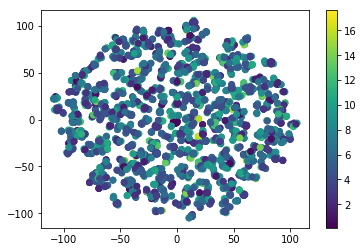

In [18]:
from sklearn.manifold import TSNE






# distM = np.dot(y.T, y)
# distM = np.amax(distM)  - distM


# im = plt.imshow(distM)
# plt.colorbar(im)
# plt.show()

num_samples = 3000

x_tsne = TSNE(n_components=2, 
              perplexity=10.0, 
              early_exaggeration=12.0, 
              learning_rate=50.0, 
              n_iter=2000 ).fit_transform(Cat[:num_samples])


sc = plt.scatter(x_tsne[:,0], x_tsne[:,1], c=ed[:num_samples])
plt.colorbar(sc)